In [1]:
import cv2
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

### Extract "inlane" frames from video
Video recorded from driving continuously within in lane ("inlane")

frame count: 8418.0
frame rate: 29.66
frame width: 640.0
frame height: 480.0


Text(0.5, 1.0, 'Inlane Class; size: (480, 640, 3)')

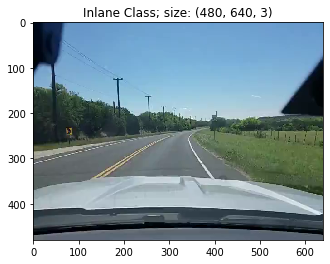

In [147]:
# get inlane video metadata
vid = './Videos and Images/Video_inlane/Rural_1.mp4'

cap = cv2.VideoCapture()
cap.open(vid)
if not cap.isOpened():
    print("Failed to open input video")
print("frame count: " + str(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frame rate: " + str(cap.get(cv2.CAP_PROP_FPS)))
 
print("frame width: " + str(cap.get(cv2.CAP_PROP_FRAME_WIDTH))) #CV_CAP_PROP_FRAME_WIDTH
print("frame height: " + str(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
plt.imshow(frame)
plt.title('Inlane Class; size: '+str(frame.shape))

In [106]:
# def video2imageFolder(input_file, output_path, sample_rate=1, save_grayscale=False):
#     '''
#     Extracts the frames from an input video file
#     and saves them as separate frames in an output directory.
#     Input:
#         input_file: Input video file.
#         output_path: Output directorys.
#         sample_rate: Integer; Indicates every ith frame will be saved
#     Output:
#         None
#     Credit: Modified code from UIUC CS445 Project 5 Utils file
#     '''

#     cap = cv2.VideoCapture()
#     cap.open(input_file)

#     if not cap.isOpened():
#         print("Failed to open input video")

#     frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
#     print("frame count: " + str(frame_count))
    
#     frame_idx = 0
    
# #     for frame_idx in range(0, int(frame_count)):
#     while frame_idx < frame_count:
#         cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx) #0-based index of the frame to be decoded/captured next.
#         #print(cap.get(1))
#  #       if frame_idx % sample_rate == 0: #Only store ith frame
#         ret, frame = cap.read()
#         if not ret:
#             print ("Failed to get the frame {}".format(frame_idx+1))
#             continue
#         out_name = os.path.join(output_path, 'f{:04d}.jpg'.format(frame_idx+1))
#         #print(out_name)

#         if save_grayscale == True:
#             # Convert BGR to HSV
#             hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#             ret = cv2.imwrite(out_name, hsv[:, :, 2])
#         else:
#             ret = cv2.imwrite(out_name, frame)
#         if not ret:
#             print ("Failed to write the frame {}".format(frame_idx))
#             continue
# #         if frame_idx + sample_rate < int(frame_count):
# #             cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx + 1) #0-based index of the frame to be decoded/captured next.
         
#         frame_idx += sample_rate
        

In [107]:
# # convert video to image frames
# vid = './Videos and Images/Video_inlane/Rural_2.mp4'

# video2imageFolder(vid, output_path='./Videos and Images/Frames_inlane', sample_rate=1, save_grayscale=True)

frame count: 2914.0


In [5]:
def video2array(input_file, max_height=4000, max_width=4000, start_height = None, sample_rate=1, save_grayscale=False):
    '''
    Extracts the frames from an input video file
    and saves them as an array of size (num_frames, frame height, frame_width, num_channels).
    Input:
        input_file: Input video file.
        max_height: Int; determines max height; will take lesser of min_height and frame height
        max_width: Int; determines max width; will take lesser of min_width and frame width
        start_height: Boolean; if provided, sets starting point for cropping height
        sample_rate: Integer; Indicates every ith frame will be saved
        save_grayscale: Boolean; Indicates if image will be saved as Value channel of HSV image 
    Output:
        None
    Credit: Modified code from UIUC CS445 Project 5 Utils file
    '''

    cap = cv2.VideoCapture()
    cap.open(input_file)

    if not cap.isOpened():
        print("Failed to open input video")
    
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    saved_frame_count = int(frame_count // sample_rate) + 1
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    if save_grayscale == True:
        frame_channels = 1
    else:
        frame_channels = 3
    print("frame count: " + str(frame_count))
    print("saved frame count: " + str(saved_frame_count))
    print("frame width: " + str(frame_width))
    print("frame height: " + str(frame_height))
       
    new_frame_width = min(frame_width, max_width)
    new_frame_height = min(frame_height, max_height)
    print("new frame width: " + str(new_frame_width))
    print("new frame height: " + str(new_frame_height))
    
    trim_width = int((frame_width - new_frame_width) // 2)
    trim_height = int((frame_height - new_frame_height) // 2)
    
    if save_grayscale == True:
        frames = np.zeros((saved_frame_count, new_frame_height, new_frame_width, frame_channels),dtype=np.uint8)
        fft_frames = np.zeros((saved_frame_count, new_frame_height, new_frame_width, frame_channels),dtype=np.float32)
    else: 
        frames = np.zeros((saved_frame_count, new_frame_height, new_frame_width, frame_channels),dtype=np.uint8)
        fft_frames = np.zeros((saved_frame_count, new_frame_height, new_frame_width, frame_channels),dtype=np.float32)
        
    

#     frame_idx = 0
#     saved_frame_idx = 0
    
    for saved_frame_idx in range(0, int(saved_frame_count)):
        frame_idx = int(saved_frame_idx * sample_rate)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx) #0-based index of the frame to be decoded/captured next.

        ret, frame = cap.read()
        if not ret:
            print ("Failed to get the frame {}".format(frame_idx+1))
            continue

        if save_grayscale == True:
            # Convert BGR to HSV
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            if start_height == None:
                cropped_v = hsv[trim_height:frame_height - trim_height
                                                       ,trim_width:frame_width - trim_width, 2]
            else:
                cropped_v = hsv[start_height:start_height+new_frame_height
                                                       ,trim_width:frame_width - trim_width, 2]
            frames[saved_frame_idx, :, :, 0] = cropped_v
            v_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(cropped_v))))
            fft_frames[saved_frame_idx, :, :, 0] = v_fft
        else:
            frames[saved_frame_idx, :, :, :] = frame[trim_height:frame_height - trim_height
                                                   ,trim_width:frame_width - trim_width, :]
            #for 3 channel fft, need to add code
    print("frames array shape: " + str(frames.shape))
    return frames, fft_frames

In [6]:
# convert video to image frames and save to numpy array
vid = './Videos and Images/Video_inlane/Rural_1.mp4'

frames_inlane, fft_frames_inlane = video2array(vid, max_height=100, max_width=480, start_height = 225, sample_rate=10, save_grayscale=True)

frame count: 8418
saved frame count: 842
frame width: 640
frame height: 480
new frame width: 480
new frame height: 100
frames array shape: (842, 100, 480, 1)


Text(0.5, 1.0, 'Inlane Class; size: (100, 480)')

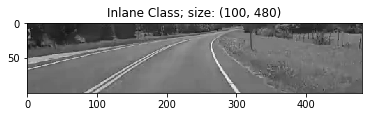

In [154]:
#sanity check
frame_idx = 0
inlane = frames_inlane[frame_idx, :, :, 0]
plt.imshow(inlane, cmap='gray')
plt.title('Inlane Class; size: '+str(inlane.shape))

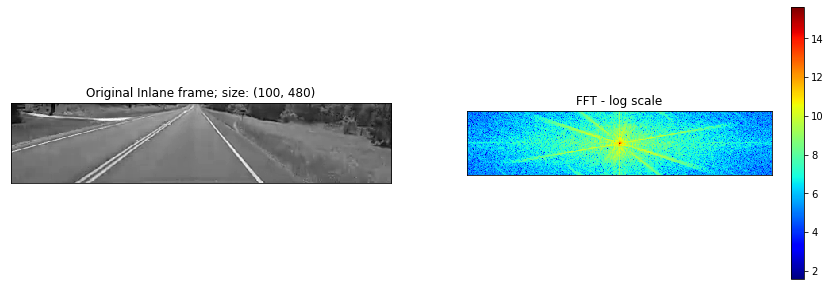

inlane.shape: (100, 480)
inlane.max(): 255
inlane.min(): 28
inlane.dtype: uint8
im_fft.shape: (100, 480)
im_fft.max(): 15.621485
im_fft.min(): 1.5926871
im_fft.dtype: float32


In [8]:
#sanity check
frame_idx = 30
inlane = frames_inlane[frame_idx, :, :, 0]

# plot frame and FFT
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].imshow(inlane, cmap='gray')
axes[0].set_title('Original Inlane frame; size: '+str(inlane.shape)), axes[0].set_xticks([]), axes[0].set_yticks([])
im_fft = fft_frames_inlane[frame_idx, :, :, 0]
im_fft_show = axes[1].imshow(im_fft,cmap='jet')
axes[1].set_title('FFT - log scale'), axes[1].set_xticks([]), axes[1].set_yticks([])
fig.colorbar(im_fft_show, ax=axes[1])
plt.show()

print("inlane.shape: " + str(inlane.shape))
print("inlane.max(): " + str(inlane.max()))
print("inlane.min(): " + str(inlane.min()))
print("inlane.dtype: " + str(inlane.dtype))

print("im_fft.shape: " + str(im_fft.shape))
print("im_fft.max(): " + str(im_fft.max()))
print("im_fft.min(): " + str(im_fft.min()))
print("im_fft.dtype: " + str(im_fft.dtype))

avg_FFT.shape: (100, 480)
avg_FFT.max(): 15.624002
avg_FFT.min(): 5.049856
avg_FFT.dtype: float32


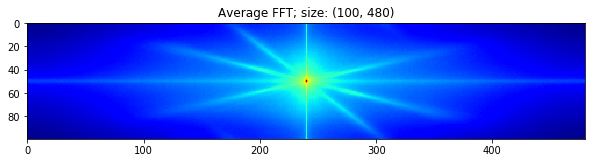

In [9]:
# Get "average" FFT pixel values
# For each pixel location in fft_frames_inlane take median of pixel values for that pixel location 
# Currently only set up for 1 channel

# create template for average FFT array
fftCount, fftHeight, fftWidth, fftChannels = fft_frames_inlane.shape
avg_FFT = np.zeros((fftHeight, fftWidth),dtype=np.float32)

#traverse all pixels in fft_frames_inlane
for row in range(0, fftHeight):
    for col in range(0, fftWidth):
        pixel_vals = fft_frames_inlane[:,row,col, 0]
        #sel_pixel_val = np.mean(pixel_vals) # didn't like
        sel_pixel_val = np.median(pixel_vals)
        #sel_pixel_val = stats.mode(pixel_vals)[0] #doesn't make sense to use mode
        avg_FFT[row,col] = sel_pixel_val
            
#display "average" FFT pixel values
%matplotlib inline
fig = plt.figure(figsize = (10,5))
im_fft_show = plt.imshow(avg_FFT,cmap='jet')
plt.title('Average FFT; size: '+str(avg_FFT.shape))
fig.colorbar(im_fft_show, ax=axes[1])

print("avg_FFT.shape: " + str(avg_FFT.shape))
print("avg_FFT.max(): " + str(avg_FFT.max()))
print("avg_FFT.min(): " + str(avg_FFT.min()))
print("avg_FFT.dtype: " + str(avg_FFT.dtype))   

### Import "depart" frames
Still images taken while departing lane either to left or right

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
depart_dir_frames_R= 'Videos and Images/Frames_depart_right'
depart_filenames_R = []
depart_filesinfo_R = os.scandir(depart_dir_frames_R)

depart_dir_frames_L= 'Videos and Images/Frames_depart_left'
depart_filenames_L = []
depart_filesinfo_L = os.scandir(depart_dir_frames_L )

In [12]:
depart_filenames_R = [f.path for f in depart_filesinfo_R if f.name.endswith(".jpg")]
depart_filenames_R.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
print(depart_filenames_R[:2])

depart_filenames_L = [f.path for f in depart_filesinfo_L if f.name.endswith(".jpg")]
depart_filenames_L.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
print(depart_filenames_L[:2])

['Videos and Images/Frames_depart_right\\20200419_132811.jpg', 'Videos and Images/Frames_depart_right\\20200419_132817.jpg']
['Videos and Images/Frames_depart_left\\20200419_132841.jpg', 'Videos and Images/Frames_depart_left\\20200419_132919.jpg']


In [32]:
# create array to store frames in memory
depart_frameCount_R = len(depart_filenames_R)
depart_frameHeight_R, depart_frameWidth_R, depart_frameChannels_R = cv2.imread(depart_filenames_R[0]).shape
depart_frameCount_L = len(depart_filenames_L)
depart_frameHeight_L, depart_frameWidth_L, depart_frameChannels_L = cv2.imread(depart_filenames_L[0]).shape

max_height=480
max_width=480
crop_height = 100 #crop after resizing; set equal to max_height if not cropping

new_frame_width_R = min(depart_frameWidth_R, max_width)
new_frame_height_R = min(depart_frameHeight_R, crop_height)
new_frame_width_L = min(depart_frameWidth_L, max_width)
new_frame_height_L = min(depart_frameHeight_L, crop_height)

#Do for V channel of HSV colormap only
frames_depart_R = np.zeros((depart_frameCount_R, new_frame_height_R, new_frame_width_R, 1),dtype=np.uint8)
fft_frames_depart_R = np.zeros((depart_frameCount_R, new_frame_height_R, new_frame_width_R, 1),dtype=np.float32)
frames_depart_L = np.zeros((depart_frameCount_L, new_frame_height_L, new_frame_width_L, 1),dtype=np.uint8)
fft_frames_depart_L= np.zeros((depart_frameCount_L, new_frame_height_L, new_frame_width_L, 1),dtype=np.float32)

print(frames_depart_R.shape)
print(fft_frames_depart_R.shape)
print(frames_depart_L.shape)
print(fft_frames_depart_L.shape)

(166, 100, 480, 1)
(166, 100, 480, 1)
(175, 100, 480, 1)
(175, 100, 480, 1)


In [47]:
# read images into frames array
# setup for only V channel of HSV
start_height = 225 # set = "False" if not cropping after resizing; select so don't see hood of truck

for idx, file_i in enumerate(depart_filenames_R):
    depart_im = cv2.imread(file_i)
    # resize
    depart_resized = cv2.resize(depart_im, (max_height, max_width), interpolation = cv2.INTER_AREA)
    #print(depart_resized.shape)
    if start_height != None:
        depart_resized = depart_resized[start_height:start_height+crop_height,:, :]
        #print(depart_resized.shape)
    
    # get HSV
    depart_hsv = cv2.cvtColor(depart_resized, cv2.COLOR_BGR2HSV)
    im_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(depart_hsv[:, :, 2]))))
    # store V channel
    frames_depart_R[idx, :, :, 0] = depart_hsv[:, :, 2]
    fft_frames_depart_R[idx, :, :, 0] = im_fft

    
start_height = 200 # set = "False" if not cropping after resizing ; select so don't see hood of truck
for idx, file_i in enumerate(depart_filenames_L):
    depart_im = cv2.imread(file_i)
    # resize
    depart_resized = cv2.resize(depart_im, (max_height, max_width), interpolation = cv2.INTER_AREA)
    if start_height != None:
        depart_resized = depart_resized[start_height:start_height+crop_height,:, :]
        
    # get HSV
    depart_hsv = cv2.cvtColor(depart_resized, cv2.COLOR_BGR2HSV)
    im_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(depart_hsv[:, :, 2]))))
    # store V channel
    frames_depart_L[idx, :, :, 0] = depart_hsv[:, :, 2]
    fft_frames_depart_L[idx, :, :, 0] = im_fft

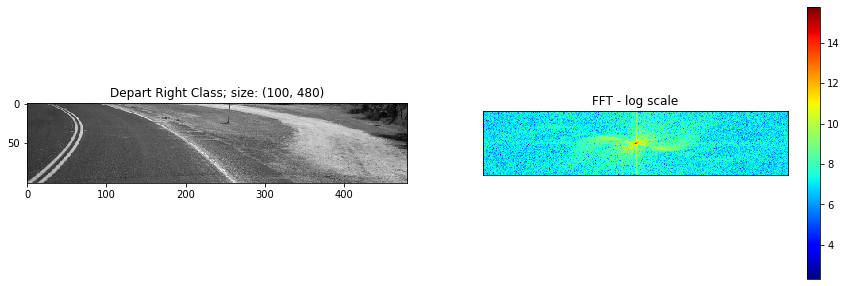

depart.shape: (100, 480)
depart.max(): 247
depart.min(): 70
depart.dtype: uint8
im_fft.shape: (100, 480)
im_fft.max(): 15.772859
im_fft.min(): 2.3153214
im_fft.dtype: float32


In [160]:
#sanity check - depart right
frame_idx = 166-31
depart = frames_depart_R[frame_idx, :, :, 0]

# plot frame and FFT
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].imshow(depart, cmap='gray')
axes[0].set_title('Depart Right Class; size: '+str(depart.shape))
im_fft = fft_frames_depart_R[frame_idx, :, :, 0]
im_fft_show = axes[1].imshow(im_fft,cmap='jet')
axes[1].set_title('FFT - log scale'), axes[1].set_xticks([]), axes[1].set_yticks([])
fig.colorbar(im_fft_show, ax=axes[1])
plt.show()

print("depart.shape: " + str(depart.shape))
print("depart.max(): " + str(depart.max()))
print("depart.min(): " + str(depart.min()))
print("depart.dtype: " + str(depart.dtype))

print("im_fft.shape: " + str(im_fft.shape))
print("im_fft.max(): " + str(im_fft.max()))
print("im_fft.min(): " + str(im_fft.min()))
print("im_fft.dtype: " + str(im_fft.dtype))

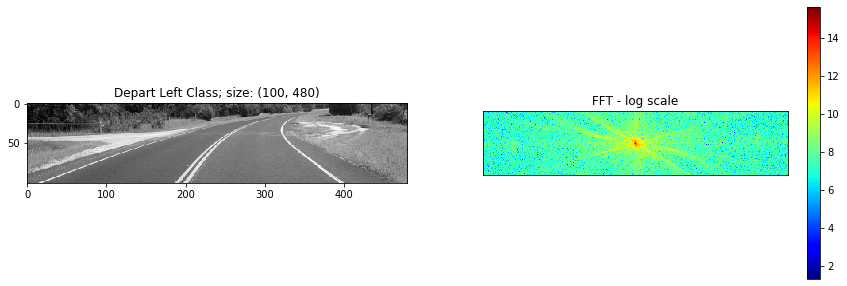

depart.shape: (100, 480)
depart.max(): 253
depart.min(): 13
depart.dtype: uint8
im_fft.shape: (100, 480)
im_fft.max(): 15.610023
im_fft.min(): 1.2999748
im_fft.dtype: float32


In [159]:
#sanity check - depart left
frame_idx = 175-94
depart = frames_depart_L[frame_idx, :, :, 0]

# plot frame and FFT
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].imshow(depart, cmap='gray')
axes[0].set_title('Depart Left Class; size: '+str(depart.shape))
im_fft = fft_frames_depart_L[frame_idx, :, :, 0]
im_fft_show = axes[1].imshow(im_fft,cmap='jet')
axes[1].set_title('FFT - log scale'), axes[1].set_xticks([]), axes[1].set_yticks([])
fig.colorbar(im_fft_show, ax=axes[1])
plt.show()

print("depart.shape: " + str(depart.shape))
print("depart.max(): " + str(depart.max()))
print("depart.min(): " + str(depart.min()))
print("depart.dtype: " + str(depart.dtype))

print("im_fft.shape: " + str(im_fft.shape))
print("im_fft.max(): " + str(im_fft.max()))
print("im_fft.min(): " + str(im_fft.min()))
print("im_fft.dtype: " + str(im_fft.dtype))

Text(0.5, 1.0, 'Depart Right Class; size: (2160, 2160, 3)')

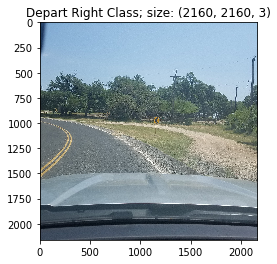

In [151]:
#FOR TESTING PURPOSES: directly import one at a time
%matplotlib inline

# images location
file = './Videos and Images/Frames_depart_left/20200426_105920.jpg'

frame = cv2.imread(file)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
plt.imshow(frame)
plt.title('Depart Left Class; size: '+str(frame.shape))



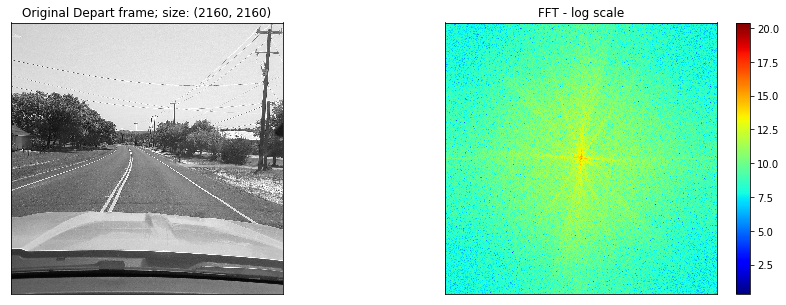

depart_v.shape: (2160, 2160)
depart_v.max(): 255
depart_v.min(): 1
depart_v.dtype: uint8


In [133]:
#FOR TESTING PURPOSES: directly import one at a time
%matplotlib inline

# images location
file = './Videos and Images/Frames_depart_left/20200419_133143.jpg'

# Load an color image in grayscale
depart = cv2.imread(file)
depart_resized = cv2.resize(depart, (480, 480), interpolation = cv2.INTER_AREA)
depart_hsv = cv2.cvtColor(depart, cv2.COLOR_BGR2HSV)
depart_v = depart_hsv[:, :, 2]

# display
fig, axes = plt.subplots(1,2, figsize=(15, 5))

axes[0].imshow(depart_v, cmap='gray')
axes[0].set_title('Original Depart frame; size: '+str(depart_v.shape)), axes[0].set_xticks([]), axes[0].set_yticks([])
im_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(depart_v))))
im_fft_show = axes[1].imshow(im_fft,cmap='jet')
axes[1].set_title('FFT - log scale'), axes[1].set_xticks([]), axes[1].set_yticks([])
fig.colorbar(im_fft_show, ax=axes[1])
plt.show()

print("depart_v.shape: " + str(depart_v.shape))
print("depart_v.max(): " + str(depart_v.max()))
print("depart_v.min(): " + str(depart_v.min()))
print("depart_v.dtype: " + str(depart_v.dtype))



avg_FFT_depart_R.shape: (100, 480)
avg_FFT_depart_R.max(): 15.5557575
avg_FFT_depart_R.min(): 6.6502657
avg_FFT_depart_R.dtype: float32


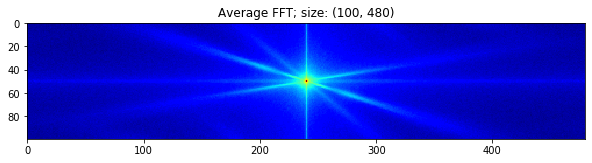

In [52]:
# Get "average" FFT pixel values
# For each pixel location in fft_frames_depart take median of pixel values for that pixel location 
# Currently only set up for 1 channel

# create template for average FFT array
fftCount, fftHeight, fftWidth, fftChannels = fft_frames_depart_R.shape
avg_FFT_depart_R = np.zeros((fftHeight, fftWidth),dtype=np.float32)
avg_FFT_depart_L = np.zeros((fftHeight, fftWidth),dtype=np.float32)

#traverse all pixels in fft_frames_depart_R
for row in range(0, fftHeight):
    for col in range(0, fftWidth):
        pixel_vals = fft_frames_depart_R[:,row,col,0]
        #sel_pixel_val = np.mean(pixel_vals) # didn't like
        sel_pixel_val = np.median(pixel_vals)
        #sel_pixel_val = stats.mode(pixel_vals)[0] #doesn't make sense to use mode
        avg_FFT_depart_R[row,col] = sel_pixel_val

#traverse all pixels in fft_frames_depart_L
for row in range(0, fftHeight):
    for col in range(0, fftWidth):
        pixel_vals = fft_frames_depart_L[:,row,col,0]
        #sel_pixel_val = np.mean(pixel_vals) # didn't like
        sel_pixel_val = np.median(pixel_vals)
        #sel_pixel_val = stats.mode(pixel_vals)[0] #doesn't make sense to use mode
        avg_FFT_depart_L[row,col] = sel_pixel_val
        
#display "average" FFT pixel values
%matplotlib inline
fig = plt.figure(figsize = (10,5))
im_fft_show = plt.imshow(avg_FFT_depart_R,cmap='jet')
plt.title('Average FFT; size: '+str(avg_FFT_depart_R.shape))
fig.colorbar(im_fft_show, ax=axes[1])

print("avg_FFT_depart_R.shape: " + str(avg_FFT_depart_R.shape))
print("avg_FFT_depart_R.max(): " + str(avg_FFT_depart_R.max()))
print("avg_FFT_depart_R.min(): " + str(avg_FFT_depart_R.min()))
print("avg_FFT_depart_R.dtype: " + str(avg_FFT_depart_R.dtype))   

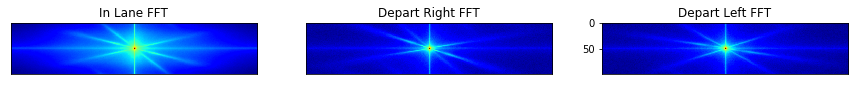

In [53]:
# compare inline and lane depart
fig, axes = plt.subplots(1,3, figsize=(15, 5))

axes[0].imshow(avg_FFT, cmap='jet')
axes[0].set_title('In Lane FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])


im_fft_show_R = axes[1].imshow(avg_FFT_depart_R,cmap='jet')
axes[1].set_title('Depart Right FFT'), axes[1].set_xticks([]), axes[1].set_yticks([])
#fig.colorbar(im_fft_show_R, ax=axes[1])

im_fft_show_L = axes[2].imshow(avg_FFT_depart_L,cmap='jet')
axes[2].set_title('Depart Left FFT'), axes[2].set_xticks([]), axes[1].set_yticks([])
#fig.colorbar(im_fft_show_L, ax=axes[2])

plt.show()

(Text(0.5, 1.0, 'Difference between Depart Left and Inlane FFTs'), [], [])

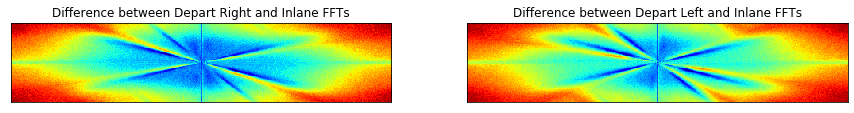

In [136]:
#display different between FFT
%matplotlib inline

diff_R = avg_FFT_depart_R/np.mean(avg_FFT_depart_R) - avg_FFT/np.mean(avg_FFT)
diff_L = avg_FFT_depart_L/np.mean(avg_FFT_depart_L) - avg_FFT/np.mean(avg_FFT)

# fig = plt.figure(figsize = (10,5))
# im_fft_show = plt.imshow(diff,cmap='jet')
# plt.title('Difference between FFTs; size: '+str(avg_FFT_depart.shape))
# fig.colorbar(im_fft_show)

# compare inline and lane depart
fig, axes = plt.subplots(1,2, figsize=(15, 5))

im_fft_show_R = axes[0].imshow(diff_R, cmap='jet')
axes[0].set_title('Difference between Depart Right and Inlane FFTs'), axes[0].set_xticks([]), axes[0].set_yticks([])

im_fft_show_L = axes[1].imshow(diff_L,cmap='jet')
axes[1].set_title('Difference between Depart Left and Inlane FFTs'), axes[1].set_xticks([]), axes[1].set_yticks([])

#### Convolutional Neural Network
Reference Material:
1. The CNN code in this article was used as a reference for my project.  Parts of the article code was used in this section with some modification. https://towardsdatascience.com/convolutional-neural-networks-for-beginners-using-keras-and-tensorflow-2-c578f7b3bf25

In [55]:
#tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [56]:
### PREPARE TRAINING AND TEST DATASETS

from tensorflow.keras.utils import to_categorical

#train and test image datasets should be numpy array of size:
#    (num_images, height, width, channels); include channel dim even if = 1
# train and test label datasets should be numpy array of size:
#    (num_images, num_labels); each "label" column should be 0 or 1


Count_inlane, Height_inlane, Width_inlane, Channels_inlane = frames_inlane.shape
Count_depart_R, Height_depart_R, Width_depart_R, Channels_depart_R = frames_depart_R.shape
Count_depart_L, Height_depart_L, Width_depart_L, Channels_depart_L = frames_depart_L.shape

print("frames_inlane shape: " + str(frames_inlane.shape))
print("frames_depart_R shape: " + str(frames_depart_R.shape))
print("frames_depart_L shape: " + str(frames_depart_L.shape))

train_percentage = 0.8 #percent expressed as decimal

Count_train_I = int(train_percentage * Count_inlane) 
Count_train_R = int(train_percentage * Count_depart_R)
Count_train_L = int(train_percentage * Count_depart_L)

Count_test_I = Count_inlane - Count_train_I
Count_test_R = Count_depart_R - Count_train_R
Count_test_L = Count_depart_L - Count_train_L

Count_train = Count_train_I + Count_train_R + Count_train_L
Count_test = Count_test_I + Count_test_R + Count_test_L

train_frames = np.zeros((Count_train, Height_inlane, Width_inlane, 1),dtype=np.float32)
test_frames = np.zeros((Count_test, Height_inlane, Width_inlane, 1),dtype=np.float32)
train_labels = np.zeros((Count_train))
test_labels = np.zeros((Count_test))

#populate train and test arrays
train_frames[ : Count_train_I] = frames_inlane[ : Count_train_I] / 255.0
train_frames[Count_train_I : Count_train_I + Count_train_R] = frames_depart_R[ : Count_train_R] / 255.0
train_frames[Count_train_I + Count_train_R : ] = frames_depart_L[ : Count_train_L] / 255.0

train_labels[ : Count_train_I] = 0
train_labels[Count_train_I : Count_train_I + Count_train_R] = 1
train_labels[Count_train_I + Count_train_R : ] = 2

test_frames[ : Count_test_I] = frames_inlane[ : Count_test_I] / 255.0
test_frames[Count_test_I : Count_test_I + Count_test_R] = frames_depart_R[ : Count_test_R] / 255.0
test_frames[Count_test_I + Count_test_R : ] = frames_depart_L[ : Count_test_L] / 255.0

test_labels[ : Count_test_I] = 0
test_labels[Count_test_I : Count_test_I + Count_test_R] = 1
test_labels[Count_test_I + Count_test_R : ] = 2

print ("train_frames: " + str(train_frames.shape))
print ("train_labels: " + str(train_labels.shape))
print ("test_frames: " + str(test_frames.shape))
print ("test_labels: " + str(test_labels.shape))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print ("train_labels: " + str(train_labels.shape))
print ("test_labels: " + str(test_labels.shape))

#CHECK - should match
print(Count_inlane + Count_depart_R + Count_depart_L)
print(train_frames.shape[0] + test_frames.shape[0])

frames_inlane shape: (842, 100, 480, 1)
frames_depart_R shape: (166, 100, 480, 1)
frames_depart_L shape: (175, 100, 480, 1)
train_frames: (945, 100, 480, 1)
train_labels: (945,)
test_frames: (238, 100, 480, 1)
test_labels: (238,)
train_labels: (945, 3)
test_labels: (238, 3)
1183
1183


In [165]:
print(Count_test_I)

169


In [57]:
#SANITY CHECK - look at label data where split between inlane and depart
print(train_labels[:3]) #all should be [1, 0, 0]
print(test_labels[:3]) #all should be [1, 0, 0]
print("")
print(train_labels[Count_train_I-3:Count_train_I+3]) 
print(test_labels[Count_test_I-3:Count_test_I+3])
print("")
print(train_labels[Count_train_I+Count_train_R-3:Count_train_I+Count_train_R+3]) 
print(test_labels[Count_test_I+Count_test_R-3:Count_test_I+Count_test_R+3])
print("")
print(train_labels[-3:]) #all should be [0, 0, 1]
print(test_labels[-3:])  #all should be [0, 0, 1]

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [60]:
### DEFINE MODEL
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(crop_height, max_width, 1))) #default is no padding, strides = (1,1)
# Parm 1: # filters - 32
# Parm 2: # nxn filter size - (5, 5)
# Parm 3: input frame size ("tensor size") - (height, width, channels)
model.add(MaxPooling2D((2, 2))) #pooling function for pooling layer
model.add(Dropout(0.25))

# add convolution layer
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# add convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# add densely connected layer



model.add(Flatten()) #flatten the 3D tensor to one of 1D
model.add(Dense(3, activation='softmax')) # Parm: number of classes

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 476, 32)       832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 238, 32)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 238, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 234, 64)       51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 117, 64)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 117, 64)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 115, 128)     

In [61]:
### TRAIN MODEL
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_frames, train_labels,
          #batch_size=100,
          epochs=5,
          #verbose=1
         )

test_loss, test_acc = model.evaluate(test_frames, test_labels)

print('Test accuracy:', test_acc)

Train on 945 samples
Epoch 1/5
945/945 [==============================] - 43s 46ms/sample - loss: 0.8918 - accuracy: 0.6910
Epoch 2/5
945/945 [==============================] - 42s 44ms/sample - loss: 0.3483 - accuracy: 0.8794
Epoch 3/5
945/945 [==============================] - 42s 44ms/sample - loss: 0.1437 - accuracy: 0.9608
Epoch 4/5
945/945 [==============================] - 42s 44ms/sample - loss: 0.1167 - accuracy: 0.9746
Epoch 5/5
238/238 [==============================] - 3s 14ms/sample - loss: 0.0759 - accuracy: 0.9832
Test accuracy: 0.9831933


In [62]:
### PREDICT
predictions = model.predict(test_frames)
print(predictions.shape)

(238, 3)


In [63]:
print(test_labels.shape)

(238, 3)


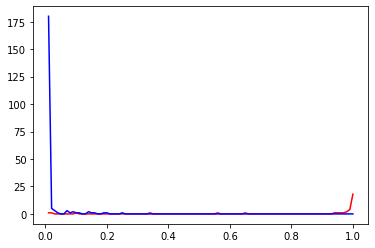

In [64]:
# view distribution of depart right (class = 1) predictions vs actual class = 1 or not
depart_pred = np.histogram(predictions[test_labels[:,1] == 1,1], bins = 100, range = (0, 1))
inlane_pred = np.histogram(predictions[test_labels[:,1] == 0,1], bins = 100, range = (0, 1))

plt.plot(depart_pred[1][1:], depart_pred[0],color = 'red')
plt.plot(inlane_pred[1][1:], inlane_pred[0],color = 'blue')

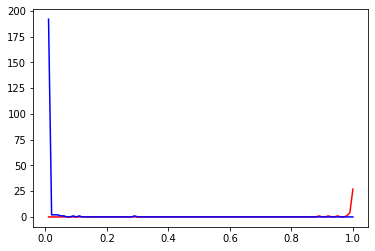

In [65]:
# view distribution of depart left (class = 2) predictions vs actual class = 2 or not
depart_pred = np.histogram(predictions[test_labels[:,2] == 1,2], bins = 100, range = (0, 1))
inlane_pred = np.histogram(predictions[test_labels[:,2] == 0,2], bins = 100, range = (0, 1))

plt.plot(depart_pred[1][1:], depart_pred[0],color = 'red')
plt.plot(inlane_pred[1][1:], inlane_pred[0],color = 'blue')

In [66]:
# CREATE CONFUSION MATRIX
from tensorflow import math

pred_2D = predictions > 0.5
act_2D = test_labels

pred_1D = np.zeros((pred_2D.shape[0]))
act_1D = np.zeros((act_2D.shape[0]))

pred_1D[pred_2D[:,0] == 1] = 0
pred_1D[pred_2D[:,1] == 1] = 1
pred_1D[pred_2D[:,2] == 1] = 2

act_1D[act_2D[:,0] == 1] = 0
act_1D[act_2D[:,1] == 1] = 1
act_1D[act_2D[:,2] == 1] = 2

math.confusion_matrix(act_1D, pred_1D)


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[169,   0,   0],
       [  4,  30,   0],
       [  0,   0,  35]])>

In [161]:
math.confusion_matrix([0, 0, 1], [0, 1, 1])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [0, 1]])>

### Demonstrate prediction on new video

In [110]:
# convert video to image frames and save to numpy array
vid_eval = './Videos and Images/Predict_LDW_sm.mpg'

frames_eval, fft_frames_eval = video2array(vid_eval, max_height=480
                                           , max_width=480, sample_rate=1, save_grayscale=False)

frames_eval_Vchan, fft_frames_eval_Vchan = video2array(vid_eval, max_height=100
                                           , max_width=480, start_height = 200, sample_rate=1, save_grayscale=True)
# set above parms so frame size matches to training data
# set start_height so don't see hood of truck


frame count: 426
saved frame count: 427
frame width: 640
frame height: 480
new frame width: 480
new frame height: 480
Failed to get the frame 427
frames array shape: (427, 480, 480, 3)
frame count: 426
saved frame count: 427
frame width: 640
frame height: 480
new frame width: 480
new frame height: 100
Failed to get the frame 427
frames array shape: (427, 100, 480, 1)


frame_rgb.shape: (480, 480, 3)
frame_rgb.max(): 255
frame_rgb.min(): 0
frame_rgb.dtype: uint8


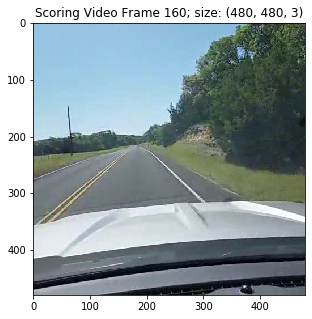

In [146]:
#sanity check
frame_idx = 160 
#check frame ~160 = departing on right
#check frame ~280 = departing on left
frame = frames_eval[frame_idx, :, :]
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# plot frame
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.imshow(frame_rgb)
plt.title('Scoring Video Frame ' + str(frame_idx) + '; size: '+str(frame_rgb.shape))

print("frame_rgb.shape: " + str(frame_rgb.shape))
print("frame_rgb.max(): " + str(frame_rgb.max()))
print("frame_rgb.min(): " + str(frame_rgb.min()))
print("frame_rgb.dtype: " + str(frame_rgb.dtype))


frame.shape: (100, 480, 1)
frame.max(): 255
frame.min(): 14
frame.dtype: uint8


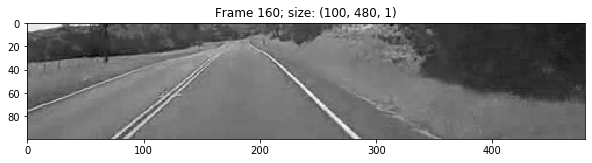

In [120]:
#sanity check - scoring frames
# shouldn't see hood of truck
frame_idx = 160 
#check frame ~160 = departing on right
#check frame ~280 = departing on left
frame = frames_eval_Vchan[frame_idx, :, :]

# plot frame
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.imshow(frame[:,:,0], cmap='gray')
plt.title('Frame ' + str(frame_idx) + '; size: '+str(frame.shape))

print("frame.shape: " + str(frame.shape))
print("frame.max(): " + str(frame.max()))
print("frame.min(): " + str(frame.min()))
print("frame.dtype: " + str(frame.dtype))


In [121]:
# predict each frame
eval_prob = model.predict(frames_eval_Vchan)

eval_pred_2D = eval_prob > 0.5

eval_pred_1D = np.zeros((eval_pred_2D.shape[0]))

eval_pred_1D[eval_pred_2D[:,0] == 1] = 0
eval_pred_1D[eval_pred_2D[:,1] == 1] = 1
eval_pred_1D[eval_pred_2D[:,2] == 1] = 2

In [123]:
# SANITY CHECK
#check frame ~160 = departing on right
#check frame ~280 = departing on left
frame_idx = 280
print(eval_prob[frame_idx])
print(eval_pred_2D[frame_idx])
print(eval_pred_1D[frame_idx])

[0. 0. 1.]
[False False  True]
2.0


msg_resized.shape: (116, 418, 3)
msg_resized.max(): 232
msg_resized.min(): 0
msg_resized.dtype: uint8


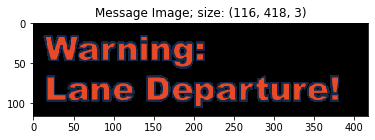

In [125]:
# message to display when lane departure predicted
msg = 'warning_message.png'

# Load an color image in grayscale
msg = cv2.imread(msg)

#change to RGB
msg = cv2.cvtColor(msg, cv2.COLOR_BGR2RGB)

msg_resized = cv2.resize(msg, (msg.shape[1]//1, msg.shape[0]//1), interpolation = cv2.INTER_AREA)

%matplotlib inline
plt.imshow(msg_resized)
plt.title('Message Image; size: '+str(msg_resized.shape))

print("msg_resized.shape: " + str(msg_resized.shape))
print("msg_resized.max(): " + str(msg_resized.max()))
print("msg_resized.min(): " + str(msg_resized.min()))
print("msg_resized.dtype: " + str(msg_resized.dtype))


msg_mask.shape: (116, 418)
msg_mask.max(): 1.0
msg_mask.min(): 0.0
msg_mask.dtype: float32


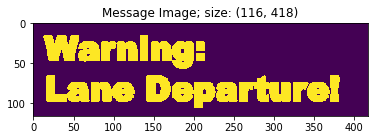

In [126]:
# message mask
msg_mask = np.ones((msg_resized.shape[0], msg_resized.shape[1]),dtype=np.float32)
msg_hsv = cv2.cvtColor(msg_resized, cv2.COLOR_BGR2HSV)
   
msg_mask[msg_hsv[:,:,2] == 0] = 0

%matplotlib inline
plt.imshow(msg_mask)
plt.title('Message Image; size: '+str(msg_mask.shape))

print("msg_mask.shape: " + str(msg_mask.shape))
print("msg_mask.max(): " + str(msg_mask.max()))
print("msg_mask.min(): " + str(msg_mask.min()))
print("msg_mask.dtype: " + str(msg_mask.dtype))

(116, 418)
frame_rgb.shape: (480, 480, 3)
frame_rgb.max(): 255
frame_rgb.min(): 0
frame_rgb.dtype: uint8


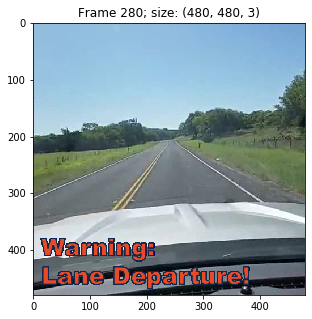

In [128]:
# test adding message to single frame only if lane departure predicted
#check frame ~160 = departing on right
#check frame ~280 = departing on left
frame_idx = 280

frame = frames_eval[frame_idx, :, :]
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

msg_height, msg_width = msg_mask.shape
print(msg_mask.shape)
frame_height, frame_width, frame_channels = frame_rgb.shape

mod_frame = np.copy(frame_rgb)

for channel in range(3):
    mod_frame[frame_height - msg_height: , : msg_width, channel] = (
        frame_rgb[frame_height - msg_height: , : msg_width, channel] * (1-msg_mask)
        + msg_resized[:, :, channel] * msg_mask)

if eval_pred_1D[frame_idx] > 0:
    frame_rgb = mod_frame
    

# plot frame
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.imshow(frame_rgb)
plt.title('Frame ' + str(frame_idx) + '; size: '+str(frame_rgb.shape))

print("frame_rgb.shape: " + str(frame_rgb.shape))
print("frame_rgb.max(): " + str(frame_rgb.max()))
print("frame_rgb.min(): " + str(frame_rgb.min()))
print("frame_rgb.dtype: " + str(frame_rgb.dtype))


In [129]:
#label each frame of evaluation video with message or not
frames_labeled = np.copy(frames_eval)

msg_resized = cv2.cvtColor(msg_resized, cv2.COLOR_RGB2BGR)
msg_height, msg_width = msg_mask.shape
frame_height, frame_width, frame_channels = frames_labeled.shape[1:]

for frame_idx in range(frames_labeled.shape[0]):
    if eval_pred_1D[frame_idx] == 0:
        continue

    for channel in range(3):
        frames_labeled[frame_idx, frame_height - msg_height: , : msg_width, channel] = (
            frames_eval[frame_idx, frame_height - msg_height: , : msg_width, channel] * (1-msg_mask)
            + msg_resized[:, :, channel] * msg_mask)

    
    


frame_rgb.shape: (480, 480, 3)
frame_rgb.max(): 255
frame_rgb.min(): 0
frame_rgb.dtype: uint8


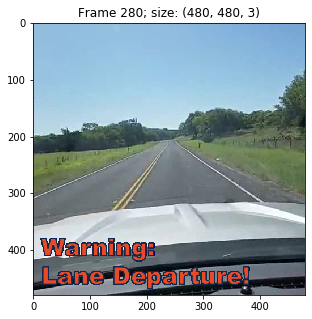

In [130]:
# sanity check
frame_idx = 280

frame = frames_labeled[frame_idx, :, :]
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  

# plot frame
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.imshow(frame_rgb)
plt.title('Frame ' + str(frame_idx) + '; size: '+str(frame_rgb.shape))

print("frame_rgb.shape: " + str(frame_rgb.shape))
print("frame_rgb.max(): " + str(frame_rgb.max()))
print("frame_rgb.min(): " + str(frame_rgb.min()))
print("frame_rgb.dtype: " + str(frame_rgb.dtype))

In [131]:
#write labelled frames to folder
for frame_idx in range(frames_labeled.shape[0]):
    #frame = cv2.normalize(src=frames_labeled[frame_idx], dst=None, alpha=0, beta=255
    #                      , norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # CREDIT: https://stackoverflow.com/a/59193141
    #BGR_img = cv2.cvtColor(foreground, cv2.COLOR_RGB2BGR)
    name = '000' + str(frame_idx)
    cv2.imwrite('Videos and Images/Frames_Predict_LDW_labeled/fr'+ name[-4:] + '.jpg', frames_labeled[frame_idx])

In [108]:
# CREDIT: The following code was taken from the project 5 utils file
def imageFolder2mpeg(input_path, output_path='./output_video.mpeg', fps=30.0):
    '''
    Extracts the frames from an input video file
    and saves them as separate frames in an output directory.
    Input:
        input_path: Input video file.
        output_path: Output directorys.
        fps: frames per second (default: 30).
    Output:
        None
    '''

    dir_frames = input_path
    files_info = os.scandir(dir_frames)

    file_names = [f.path for f in files_info if f.name.endswith(".jpg")]
    file_names.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    frame_Height, frame_Width = cv2.imread(file_names[0]).shape[:2]
    resolution = (frame_Width, frame_Height)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MPG1')
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, resolution)

    frame_count = len(file_names)

    frame_idx = 0

    while frame_idx < frame_count:


        frame_i = cv2.imread(file_names[frame_idx])
        video_writer.write(frame_i)
        frame_idx += 1

    video_writer.release()

In [132]:
# create video
imageFolder2mpeg('Videos and Images/Frames_Predict_LDW_labeled'
                       , output_path='./Videos and Images/Predict_LDW_labeled.mpeg'
                       , fps=30)